<h3>note : coba hapus Healthy fish data jadi bias</h3>

<title>Identifikasi Penjakit pada ikan dengan cnn </title>
<br><hr>
Author : Bima Darmaja Suryatama

<h1>data pre</h1>

In [1]:
import pathlib
from google.colab import drive

drive.mount('/content/gdrive')
data_dir = "/content/gdrive/MyDrive/dataset"
data_dir = pathlib.Path(data_dir)

Mounted at /content/gdrive


In [2]:
!unzip /content/gdrive/MyDrive/dataset/SB-FishDisease.zip -d data

Archive:  /content/gdrive/MyDrive/dataset/SB-FishDisease.zip
  inflating: data/SB-FishDisease/SB-FishDiseases/Viral diseases White tail disease/Viral diseases White tail disease (4).png  
  inflating: data/SB-FishDisease/SB-FishDiseases/Viral diseases White tail disease/Viral diseases White tail disease (2).jpg  
  inflating: data/SB-FishDisease/SB-FishDiseases/Viral diseases White tail disease/Viral diseases White tail disease (7).jpeg  
  inflating: data/SB-FishDisease/SB-FishDiseases/Viral diseases White tail disease/Viral diseases White tail disease (2).jpeg  
  inflating: data/SB-FishDisease/SB-FishDiseases/Viral diseases White tail disease/Viral diseases White tail disease (24).jpg  
  inflating: data/SB-FishDisease/SB-FishDiseases/Viral diseases White tail disease/Viral diseases White tail disease (1).jpg  
  inflating: data/SB-FishDisease/SB-FishDiseases/Viral diseases White tail disease/Viral diseases White tail disease (9).jpeg  
  inflating: data/SB-FishDisease/SB-FishDiseas

In [3]:
import tensorflow as tf

In [4]:
data = tf.keras.utils.image_dataset_from_directory('data/SB-FishDisease/SB-FishDiseases')
# Get the class names
class_names = data.class_names
# Print the class names
print(class_names)
len(data)

Found 360 files belonging to 7 classes.
['Bacterial Red disease', 'Bacterial diseases - Aeromoniasis', 'Bacterial gill disease', 'Fungal diseases Saprolegniasis', 'Healthy Fish', 'Parasitic diseases', 'Viral diseases White tail disease']


12

In [5]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

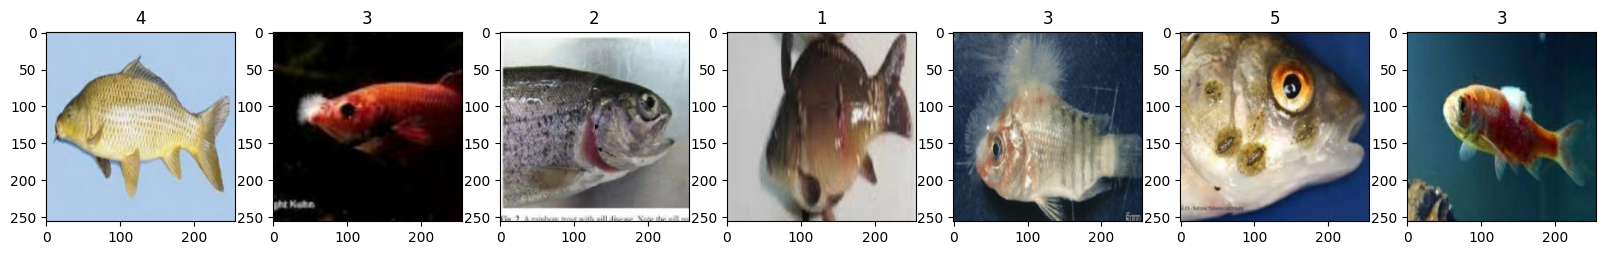

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(str(batch[1][idx]))

<h1>SPLIT DATA TRAIN VAL TEST</h1>

In [7]:
len(data)

12

In [8]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [9]:
# untuk tes
#train_size
#val_size
#test_size

In [10]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [11]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

<h1> modeling data </h1>

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [14]:
model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [16]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

class AccuracyStopCallback(Callback):
    def __init__(self, target_accuracy=0.98):
        super(AccuracyStopCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= self.target_accuracy:
            self.model.stop_training = True

# Create an instance of the AccuracyStopCallback
accuracy_stop_callback = AccuracyStopCallback(target_accuracy=0.98)

In [17]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[accuracy_stop_callback])

Epoch 1/30
8/8 [==============================] - 23s 3s/step - loss: 201.8530 - accuracy: 0.1172 - val_loss: 3.9821 - val_accuracy: 0.2083
Epoch 2/30
8/8 [==============================] - 20s 3s/step - loss: 2.0886 - accuracy: 0.2930 - val_loss: 1.6631 - val_accuracy: 0.3438
Epoch 3/30
8/8 [==============================] - 20s 3s/step - loss: 1.5803 - accuracy: 0.4297 - val_loss: 1.3017 - val_accuracy: 0.5417
Epoch 4/30
8/8 [==============================] - 20s 2s/step - loss: 1.2968 - accuracy: 0.5352 - val_loss: 1.0638 - val_accuracy: 0.6667
Epoch 5/30
8/8 [==============================] - 20s 2s/step - loss: 0.9977 - accuracy: 0.6719 - val_loss: 0.8222 - val_accuracy: 0.8021
Epoch 6/30
8/8 [==============================] - 22s 3s/step - loss: 0.6702 - accuracy: 0.8125 - val_loss: 0.5676 - val_accuracy: 0.8438
Epoch 7/30
8/8 [==============================] - 20s 3s/step - loss: 0.4691 - accuracy: 0.8672 - val_loss: 0.3343 - val_accuracy: 0.9479
Epoch 8/30
8/8 [================

<h1>Ploting data </h1>

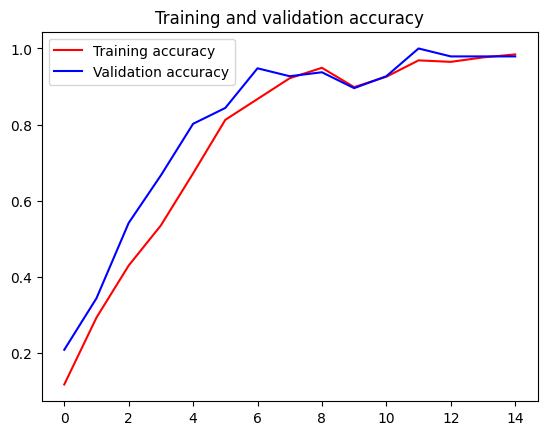

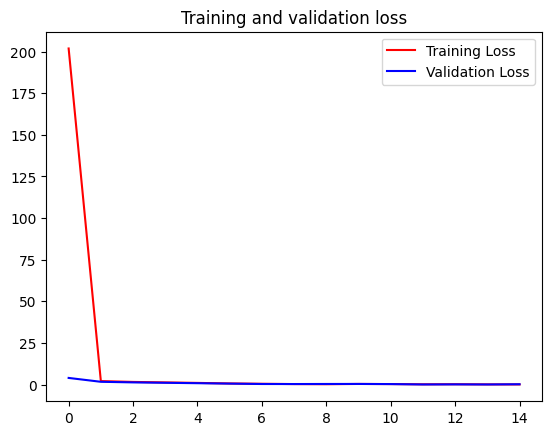

In [18]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<h1>TEST THE MODEL WITH INPUT IMAGE</h1>

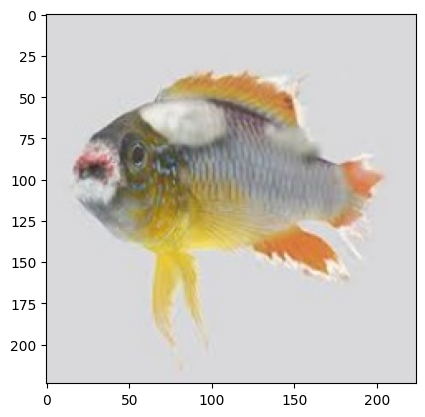

In [46]:
import skimage.io
import cv2
# kenapa warna merah jadi biru ?
img_link = '/content/data/SB-FishDisease/SB-FishDiseases/Viral diseases White tail disease/Viral diseases White tail disease (24).jpg'

img = skimage.io.imread(img_link)
cv2.imwrite(img_link, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.imshow(img)
plt.show()

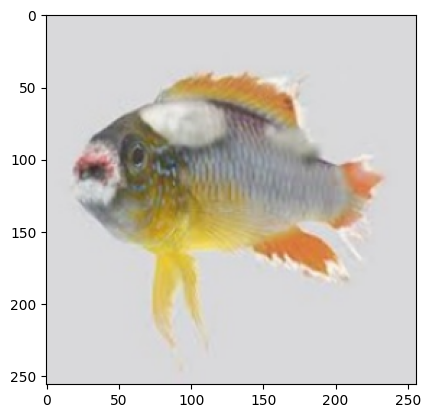

In [47]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
import numpy as np

# Preprocess the image
resized_image = resize / 255.0
input_image = np.expand_dims(resized_image, axis=0)

# Make predictions
yhat = model.predict(input_image)

# Get the predicted class index
predicted_class_index = np.argmax(yhat, axis=1)

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index[0]]

# Get the class probabilities
class_probabilities = yhat[0]

# Print the predicted class and probabilities
print("Predicted class:", predicted_class_name)
print("Class probabilities:", class_probabilities)

1/1 [==============================] - 0s 60ms/step
Predicted class: Bacterial Red disease
Class probabilities: [0.15737571 0.13458863 0.1356135  0.15010412 0.1481823  0.14155369
 0.13258208]
